In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *
import pickle

# local imports
from modules.mesh_utils import get_mesh
from modules.physics_utils import get_VandE, compute_trajectory, coord_impact, intersection, compute_trajectory_1dt
#from modules.plotting_utils import ?

# First example
cas 4 : 0.004,0.01 pour L_2,l_2

In [7]:
mesh_dict = { # we need L < L_mot
    'L_mot' : .005,
    'l_mot' : .003,
    'L_1' : .003, # dim_trou = L_mot-L = .002 ici
    'l_1': .001,
    'L_2' : .004, # dim_trou = .001 ici
    'l_2' : .01,
    'delta_vert_12' : .001,
    'L_vacuum' : .05,
    'l_vacuum': .02,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'l_rho':0, #dist between rho and 0 // <l_2 // if 0, we consider rhoelec uniform
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,#Best ==> 'tmax' : .00002 and 'dt' : .00000001 and '%Nout':100
    'M_NUCLEON':1.7e-27,
}
#Best ==> 'tmax' : .00002 and 'dt' : .00000001 and '%Nout':100
integration_parameters_dict = { 
    'tmax' : .00002,
    'dt' : .00000001,
    '%Nout': 100,
}

injection_dict = {
    'Nombre de particules':1000,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e9,
    'gamma':1,
    'Vion':2000,
    'Vneutre':200,
    'Sigma_Vion':500,
    'Sigma_Vneutre':80,
}

mode_dict={
    'Choc symétrique?':False,
    'Contact inter particules?':False,
    'coef inelasticite':0.1,
    'coef scattering':0.3,
    'proba perte q par choc':1,
    'X0 fixe ?':False,
}

# Creating mesh

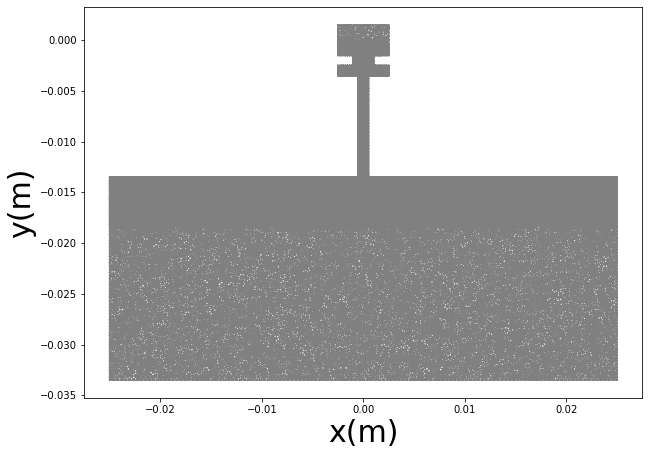

In [8]:
mesh, segments_list, zone = get_mesh(mesh_dict)

plt.figure(figsize=(10,10))
plot(mesh)
plt.xlabel('x(m)', size=30)
plt.ylabel('y(m)', size=30)
plt.show()

# E and V computations

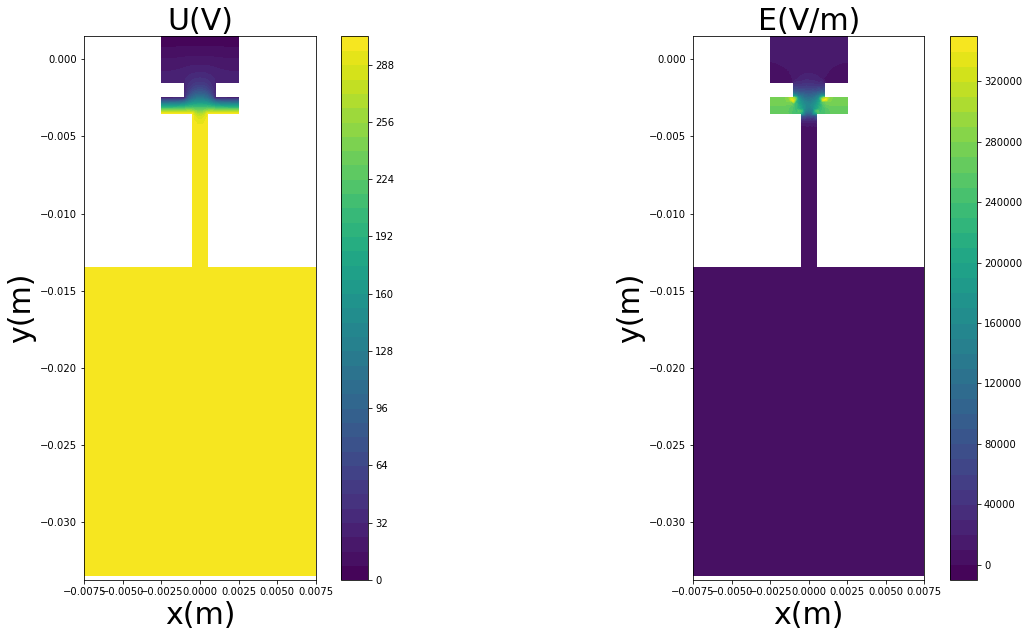

In [9]:
Phi, E, f = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

borne_inf_x=-1.5*mesh_dict['L_mot']
borne_sup_x=1.5*mesh_dict['L_mot']
borne_inf_y=-2.5*(.5*mesh_dict['l_mot']+mesh_dict['l_1']+mesh_dict['l_2']+mesh_dict['delta_vert_12'])
borne_sup_y=.5*mesh_dict['l_mot']

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
fig=plot(Phi)
plt.title('U(V)', size=30)
fig.set_cmap("viridis") 
plt.colorbar(fig)
plt.xlim(borne_inf_x,borne_sup_x)
plt.ylim(borne_inf_y,borne_sup_y)
plt.xlabel('x(m)', size=30)
plt.ylabel('y(m)', size=30)

plt.subplot(1,2,2)
fig=plot(NE)
plt.title('E(V/m)', size=30)
fig.set_cmap("viridis") 
plt.colorbar(fig)
plt.xlim(borne_inf_x,borne_sup_x)
plt.ylim(borne_inf_y,borne_sup_y)
plt.xlabel('x(m)', size=30)
plt.ylabel('y(m)', size=30)

plt.show()

# Some simulations

In [ ]:
Nb_out, pf_3_especes, alpha_moy_3_especes, alpha_sigma_3_especes, V_moy_3_especes, V_sigma_3_especes, \
listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t, \
liste_alpha1, liste_alpha2, liste_alpha3, liste_V1, liste_V2, liste_V3 = \
compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone, E, physics_consts_dict, True)

plt.figure(figsize=(12,12))
fig=plot(NE)
for i in range (injection_dict['Nombre de particules']):
    plt.plot(listes_x[i],listes_y[i],linestyle='-',color='r')
    plt.scatter(listes_x[i][0],listes_y[i][0],color='r')
    plt.scatter(listes_x[i][-1],listes_y[i][-1],color='r')
plt.title('E (V/m)', size=35)
plt.xlabel('x (m)',size=35)
plt.ylabel('y (m)',size=35)
fig.set_cmap("viridis")
plt.colorbar(fig)
plt.show()
    
print('proportions finales de I,I+,I- = ',pf_3_especes)
print("proportions finales de l'angle de la vitesse de I,I+,I- = ",alpha_moy_3_especes)
print('proportions finales de la norme de la vitesse 2D de I,I+,I- = ',V_moy_3_especes)

début d'initialisation
début de l'injection
Avancement de 0%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 2%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 4%, 0 particules sorties
Avancement de 5%, 0 particules sorties
Avancement de 6%, 0 particules sorties
Avancement de 7%, 0 particules sorties
Avancement de 8%, 0 particules sorties
Avancement de 9%, 0 particules sorties
Avancement de 10%, 0 particules sorties
Avancement de 11%, 0 particules sorties


# let's change dt

In [6]:
mesh_dict = { # we need L < L_mot
    'L_mot' : .005,
    'l_mot' : .003,
    'L_1' : .003, # dim_trou = L_mot-L = .002 ici
    'l_1': .001,
    'L_2' : .004, # dim_trou = .001 ici
    'l_2' : .0092,
    'delta_vert_12' : .001,
    'L_vacuum' : .05,
    'l_vacuum': .02,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'l_rho':0, #dist between rho and 0 // <l_2 // if 0, we consider rhoelec uniform
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,#Best ==> 'tmax' : .00002 and 'dt' : .00000001 and '%Nout':100
    'M_NUCLEON':1.7e-27,
}

integration_parameters_dict = { 
    'tmax' : .000007,
    'dt' : .00000005,
    '%Nout': 100,
}

injection_dict = {
    'Nombre de particules':1,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e9,
    'gamma':1,
    'Vion':2000,
    'Vneutre':200,
    'Sigma_Vion':500,
    'Sigma_Vneutre':80,
}

mode_dict={ #On enleve l'alea ici
    'Choc symétrique?':True,
    'Contact inter particules?':False,
    'coef inelasticite':0,
    'coef scattering':0,
    'proba perte q par choc':0,
    'X0 fixe ?':True,
}

début d'initialisation
début de l'injection
toutes les particules sont injectées
Avancement de 0%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 4%, 0 particules sorties
Avancement de 6%, 0 particules sorties
Avancement de 7%, 0 particules sorties
Avancement de 9%, 0 particules sorties
Avancement de 10%, 0 particules sorties
Avancement de 11%, 0 particules sorties
Avancement de 13%, 0 particules sorties
Avancement de 14%, 0 particules sorties
Avancement de 16%, 0 particules sorties
Avancement de 17%, 0 particules sorties
Avancement de 19%, 0 particules sorties
fin du calcul, critère d'arret: % Nb_out, t=1.3999999999999997e-06
début traitement de données
début d'initialisation
début de l'injection
toutes les particules sont injectées
Avancement de 0%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 2%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 4%, 0 particules sor

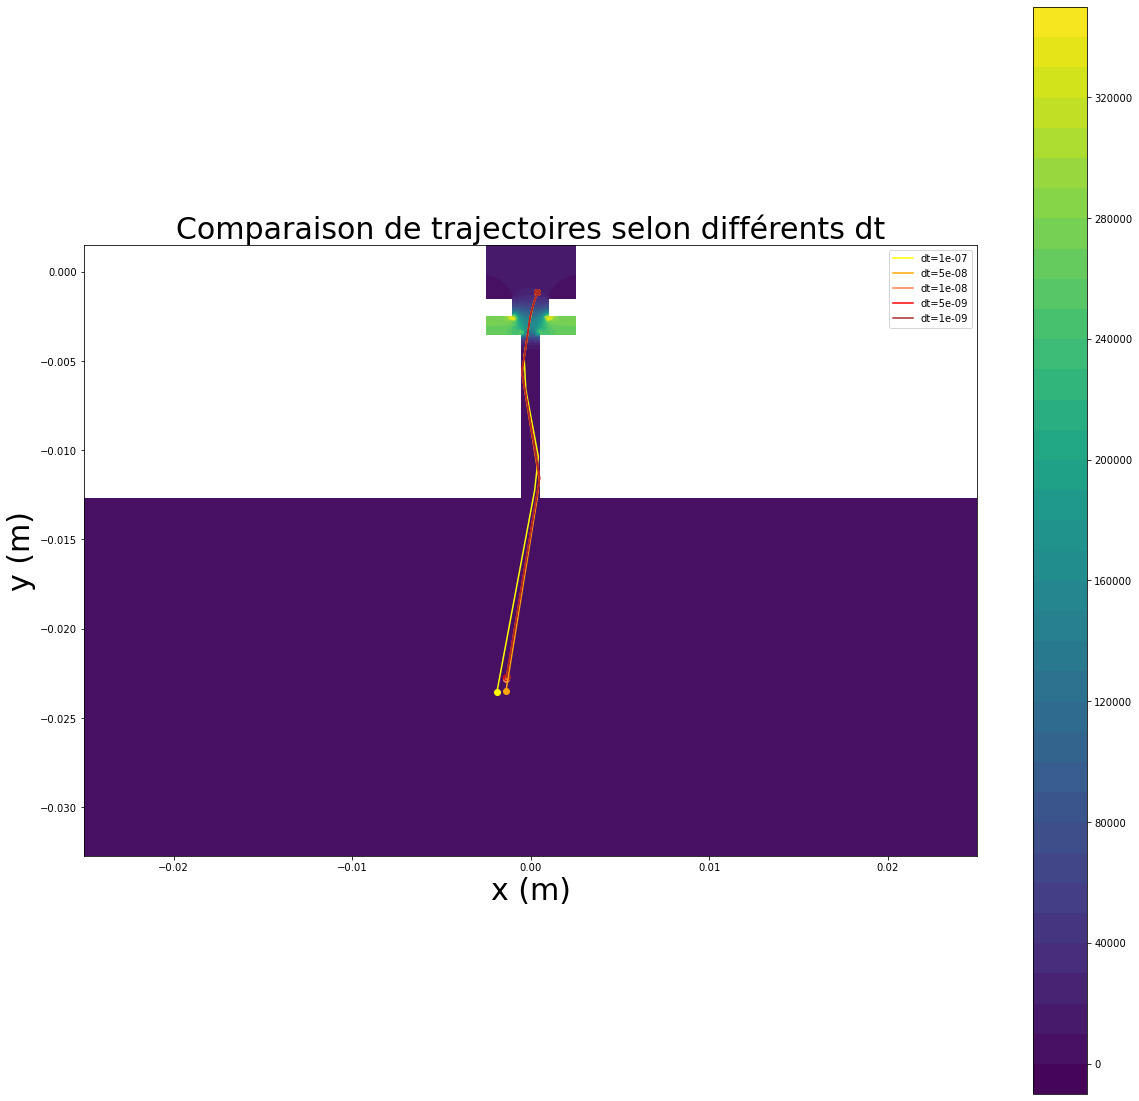

choc symetrique, proba_perte_charge=0, eta=0, sans collision, gamma=1, rho=0


In [7]:
mesh, segments_list, zone = get_mesh(mesh_dict)
Phi, E, f = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

liste_dt=[1e-7,5e-8,1e-8,5e-9,1e-9]#[1e-5,1e-6,1e-7,1e-8,1e-9]
liste_c=['yellow','orange','coral','red','brown']

plt.figure(figsize=(20,20))
fig=plot(NE)

for i in range(len(liste_dt)):
    dt=liste_dt[i]
    integration_parameters_dict['dt']=dt
    
    Nb_out, pf_3_especes, alpha_moy_3_especes, alpha_sigma_3_especes, V_moy_3_especes, V_sigma_3_especes, \
    listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t, \
    liste_alpha1, liste_alpha2, liste_alpha3, liste_V1, liste_V2, liste_V3 = \
    compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone, E, physics_consts_dict, True)
    
    plt.plot(listes_x[0],listes_y[0],linestyle='-',color=liste_c[i],label='dt='+str(dt))
    plt.scatter(listes_x[0][0],listes_y[0][0],color=liste_c[i])
    plt.scatter(listes_x[0][-1],listes_y[0][-1],color=liste_c[i])
    
plt.xlabel('x (m)',size=30)
plt.ylabel('y (m)',size=30)
fig.set_cmap("viridis")
plt.legend()
plt.title('Comparaison de trajectoires selon différents dt', size=30)
plt.colorbar(fig)
plt.show()

print('choc symetrique, proba_perte_charge=0, eta=0, sans collision, gamma=1, rho=0')

# Let's change N

In [ ]:
mesh_dict = { # we need L < L_mot
    'L_mot' : .005,
    'l_mot' : .003,
    'L_1' : .003, # dim_trou = L_mot-L = .002 ici
    'l_1': .001,
    'L_2' : .004, # dim_trou = .001 ici
    'l_2' : .002,
    'delta_vert_12' : .001,
    'L_vacuum' : .05,
    'l_vacuum': .02,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'l_rho':0, #dist between rho and 0 // <l_2 // if 0, we consider rhoelec uniform
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,#Best ==> 'tmax' : .00002 and 'dt' : .00000001 and '%Nout':100
    'M_NUCLEON':1.7e-27,
}

integration_parameters_dict = { 
    'tmax' : .000007,
    'dt' : .00000005,
    '%Nout': 95,
}

injection_dict = {
    'Nombre de particules':1,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e10,
    'gamma':1,
    'Vion':2000,
    'Vneutre':200,
    'Sigma_Vion':500,
    'Sigma_Vneutre':80,
}

mode_dict={
    'Choc symétrique?':False,
    'Contact inter particules?':False,
    'coef inelasticite':0.1,
    'coef scattering':0.3,
    'proba perte q par choc':1,
    'X0 fixe ?':False,
}

In [ ]:
mesh, segments_list, zone = get_mesh(mesh_dict)
Phi, E, f = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

liste_N=[10,30,100,300,1000,3000]
liste_Nb_out=[]
alpha_moy=[]
alpha_sigma=[]

for N in liste_N:
    injection_dict['Nombre de particules']=N
    
    Nb_out, pf_3_especes, alpha_moy_3_especes, alpha_sigma_3_especes, V_moy_3_especes, V_sigma_3_especes = \
    compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone,E, physics_consts_dict, False)
    
    liste_Nb_out.append(Nb_out)
    alpha_moy.append(alpha_moy_3_especes[0]*pf_3_especes[0]+alpha_moy_3_especes[2]*pf_3_especes[2])
    alpha_sigma.append(alpha_sigma_3_especes[0]*pf_3_especes[0]+alpha_sigma_3_especes[2]*pf_3_especes[2])
    
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
plt.semilogx()
plt.scatter(liste_N,\
            alpha_moy,
            color='r')
plt.errorbar(liste_N,\
             alpha_moy,\
             yerr=1.96*np.array(alpha_sigma)*np.power(np.array(liste_Nb_out)-1,-.5),\
             fmt = 'none', capsize = 7,elinewidth=1, ecolor='k')

y=np.array(alpha_moy)
y_pi   = y/np.pi
unit   = 0.05
y_tick = np.arange(-0.05, 0.051, unit)
y_label = [r"$-\frac{\pi}{20}$", r"$0$", r"$+\frac{\pi}{20}$"]
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label, fontsize=20)
plt.xlabel("N",size=30)
plt.ylabel("Angle moyen du flux en sortie (rad)",size=30)
plt.axhline(y=0, linewidth=1, color='k', linestyle='--')
plt.title("comparaison des angles moyens de sortie selon N",size=30)
plt.show()

print('proba_perte_charge=1, eta=0.1, sans collision, gamma=1, rho=0, chocs non symetriques, scattering 0.3')

# Distribution alpha I- après n dt

In [ ]:
mesh_dict = { # we need L < L_mot
    'L_mot' : .005,
    'l_mot' : .003,
    'L_1' : .003, # dim_trou = L_mot-L = .002 ici
    'l_1': .001,
    'L_2' : .004, # dim_trou = .001 ici
    'l_2' : .002,
    'delta_vert_12' : .001,
    'L_vacuum' : .05,
    'l_vacuum': .02,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'l_rho':0, #dist between rho and 0 // <l_2 // if 0, we consider rhoelec uniform
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,#Best ==> 'tmax' : .00002 and 'dt' : .00000001 and '%Nout':100
    'M_NUCLEON':1.7e-27,
}

integration_parameters_dict = { 
    'tmax' : .000007,
    'dt' : .00000005,
    '%Nout': 95,
}

injection_dict = {
    'Nombre de particules':1000,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e10,
    'gamma':1,
    'Vion':2000,
    'Vneutre':200,
    'Sigma_Vion':500,
    'Sigma_Vneutre':80,
}

mode_dict={
    'Choc symétrique?':False,
    'Contact inter particules?':False,
    'coef inelasticite':0.1,
    'coef scattering':0.3,
    'proba perte q par choc':1,
    'X0 fixe ?':False,
}

In [ ]:
n_dt=1
integration_parameters_dict['tmax']=n_dt*integration_parameters_dict['dt']

In [ ]:
mesh, segments_list, zone = get_mesh(mesh_dict)
Phi, E, f = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

Nb_out, pf_3_especes, alpha_moy_3_especes, alpha_sigma_3_especes, V_moy_3_especes, V_sigma_3_especes, \
listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t, \
liste_alpha1, liste_alpha2, liste_alpha3, liste_V1, liste_V2, liste_V3 = \
compute_trajectory_1dt(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone,E, physics_consts_dict, True)

fig, ax = plt.figure(figsize=(15,15))
ax.hist(liste_alpha3,bins=30)
x=np.array(liste_alpha3)
x_pi   = y/np.pi
unit   = 0.05
x_tick = np.arange(-0.1, 0.101, unit)
x_label = [r"$-\frac{\pi}{10}$", r"$-\frac{\pi}{20}$", r"$0$", r"$+\frac{\pi}{20}$", r"$+\frac{\pi}{10}$"]
ax.set_xticks(x_tick*np.pi)
ax.set_xticklabels(x_label, fontsize=20)
plt.xlabel('angle (rad)',size=30)
plt.ylabel('effectif',size=30)
plt.title('Distribution des angles des I- après '+str(n_dt)+'dt')
plt.show()

print('1000 particules, choc non symetrique, proba_perte_charge=1, eta=0.1, sans collision, gamma=1, rho=0, scattering=0.3')